In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("merged_data.csv")

In [5]:
#select only numerical datatypes
data_n = data.select_dtypes(include = ["number"])

In [87]:
data_n = data_n[~data_n["Y2C"].isin([-2, -3, -4])] #dropping negative y2c values

X_unimputed = data_n.drop(["Y2C"], axis = 1)


In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median") #creating an imputer to fillna values with the col median

#seperating the closed and open school data
closed_data = data_n[data_n["Y2C"] != -1]
open_data = data_n[data_n["Y2C"] == -1]

#imputing both datasets na's
open_data_imputed = imputer.fit_transform(open_data)
closed_data_imputed = imputer.fit_transform(closed_data)

#turing them into dataframes and preserving the col names
open_data_imputed_df = pd.DataFrame(open_data_imputed, columns = open_data.columns)
closed_data_imputed_df = pd.DataFrame(closed_data_imputed, columns = closed_data.columns)

#merging the full data back together
full_data = pd.concat([closed_data_imputed_df, open_data_imputed_df], axis = 0)

full_data.head()

,Unnamed: 0,UNITID,Year,YearClosed,Y2C,Closing,Total_Assets,Total_Liabilities,Buildings_Ending_Balance,Total_for_Plant_Ending_Balance,...,EFYUNKNW,EFTEUG,SFAFORM,FTEMP15,F2PELL,F_ATHLTC,EFYASIAM,EFYASIAW,EFYHISPT,EFYHISPM
0,178.0,110918.0,2023.0,2023.0,0.0,0.0,7117677.5,3087854.5,1184400.0,3599222.0,...,7.0,374.5,1.0,1.0,1.0,3.0,2.0,4.0,43.0,13.0
1,248.0,115728.0,2023.0,2023.0,0.0,0.0,7117677.5,3087854.5,1184400.0,3599222.0,...,7.0,374.5,1.0,1.0,1.0,3.0,2.0,4.0,43.0,13.0
2,589.0,137801.0,2023.0,2023.0,0.0,0.0,7117677.5,3087854.5,1184400.0,3599222.0,...,7.0,374.5,1.0,1.0,1.0,3.0,2.0,4.0,43.0,13.0
3,828.0,149763.0,2023.0,2024.0,1.0,0.0,7117677.5,3087854.5,1184400.0,3599222.0,...,7.0,374.5,1.0,1.0,1.0,3.0,2.0,4.0,43.0,13.0
4,905.0,153621.0,2023.0,2023.0,0.0,0.0,7117677.5,3087854.5,1184400.0,3599222.0,...,7.0,374.5,1.0,1.0,1.0,3.0,2.0,4.0,43.0,13.0


In [9]:
X = full_data.drop(["Y2C"], axis = 1)
y = full_data["Y2C"]

In [10]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

array([4, 4, 4, ..., 3, 3, 3])

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_unimputed, X_test_unimputed, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state = 42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
model = RandomForestClassifier(random_state = 42, n_estimators = 100)

In [16]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test)

In [85]:
cm = confusion_matrix(y_test, y_pred)[2:, 2:]

confusion_matrix(y_test, y_pred)

array([[   0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 7035,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,   29,    5,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    3,   25,    0,    0,    0,    1,    0,    0,    0],
       [   0,    0,    0,    0,   12,   13,    2,    0,    0,    0,    0],
       [   0,    0,    0,    0,   21,    1,    4,    0,    0,    0,    0],
       [   0,    0,    0,    0,    7,    6,    0,    0,    0,    0,    0],
       [   0,    0,    0,    7,    0,    0,    0,    2,    5,    1,    0],
       [   0,    0,    0,    3,    0,    0,    0,    6,    0,    3,    0],
       [   0,    0,    0,    1,    0,    0,    0,    0,    2,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0]])

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00      7035
           4       0.88      0.85      0.87        34
           5       0.61      0.86      0.71        29
           6       0.30      0.44      0.36        27
           7       0.05      0.04      0.04        26
           8       0.00      0.00      0.00        13
           9       0.22      0.13      0.17        15
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1

    accuracy                           0.99      7196
   macro avg       0.28      0.30      0.29      7196
weighted avg       0.99      0.99      0.99      7196



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


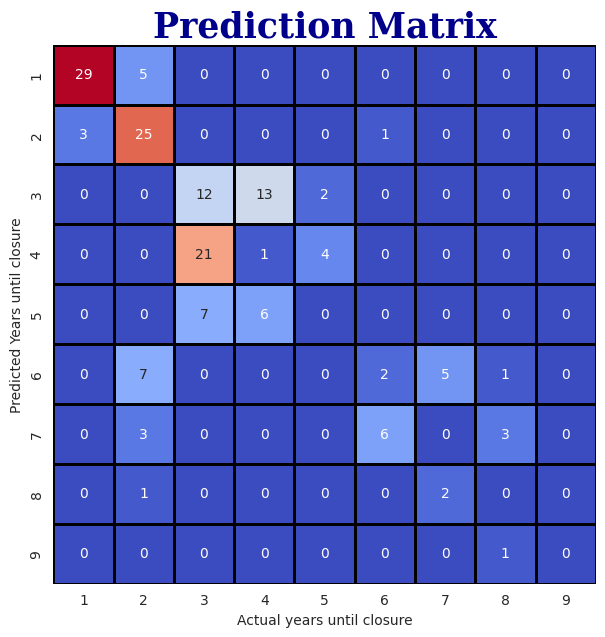

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (7, 7))
sns.heatmap(cm, cmap = "coolwarm", annot = True, lw = 1, linecolor = "black", cbar = False)
plt.xlabel("Actual years until closure")
plt.ylabel("Predicted Years until closure")
plt.title("Prediction Matrix", fontdict={"weight" :"bold", "font" :"serif", "color" :"darkblue", "size" : 25})

#adjusting the tick labels
ticks = plt.xticks()[0]
plt.xticks(ticks, [int(t + 1) for t in ticks])
plt.yticks(ticks, [int(t + 1) for t in ticks])

plt.show()

In [89]:
model_2 = RandomForestClassifier(n_estimators=100, random_state = 42)
model_2.fit(X_train_unimputed, y_train)

RandomForestClassifier(random_state=42)

In [90]:
model_2_preds = model_2.predict(X_test)

In [93]:
confusion_matrix(y_test, model_2_preds)
print(classification_report(y_test, model_2_preds))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00      7035
           4       0.88      0.85      0.87        34
           5       0.61      0.86      0.71        29
           6       0.30      0.44      0.36        27
           7       0.05      0.04      0.04        26
           8       0.00      0.00      0.00        13
           9       0.22      0.13      0.17        15
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1

    accuracy                           0.99      7196
   macro avg       0.28      0.30      0.29      7196
weighted avg       0.99      0.99      0.99      7196



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [102]:
X_new = X.drop(["YearClosed", "Closing", "Year"], axis = 1)

In [103]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y ,test_size = 0.2, random_state = 42)

In [104]:
new_model = RandomForestClassifier(random_state = 42, n_estimators=42)
new_model.fit(X_train_new, y_train)

RandomForestClassifier(n_estimators=42, random_state=42)

In [105]:
new_preds = new_model.predict(X_test_new)

In [112]:
cm2 = confusion_matrix(y_test, new_preds)[2:, 2:]

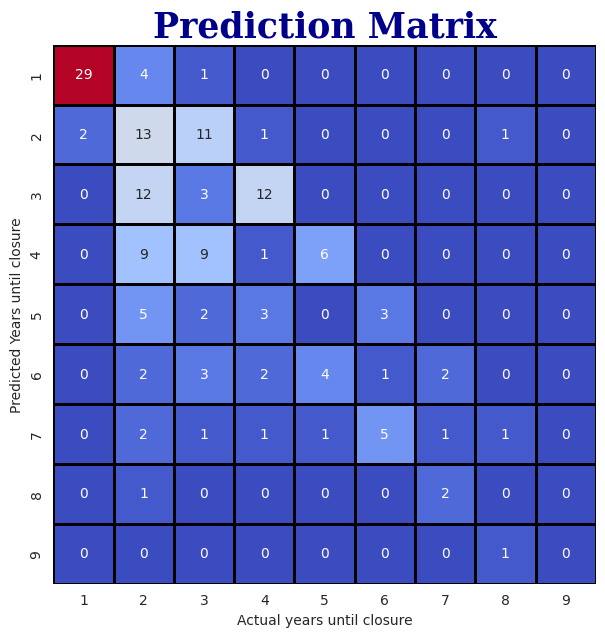

In [113]:
plt.figure(figsize = (7, 7))
sns.heatmap(cm2, cmap = "coolwarm", annot = True, lw = 1, linecolor = "black", cbar = False)
plt.xlabel("Actual years until closure")
plt.ylabel("Predicted Years until closure")
plt.title("Prediction Matrix", fontdict={"weight" :"bold", "font" :"serif", "color" :"darkblue", "size" : 25})

#adjusting the tick labels
ticks = plt.xticks()[0]
plt.xticks(ticks, [int(t + 1) for t in ticks])
plt.yticks(ticks, [int(t + 1) for t in ticks])

plt.show()